# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_LinkedIn_3.csv")
df.head()

,userName,score,at,content
0,Didit Apriyanto09,1,2024-04-23 20:37:41,Aplikasi sampah
1,Faiz Hanafi,1,2024-04-23 14:31:29,aplikasi gak tau diri bodoh
2,Ahmad Farel Ardhana,1,2024-04-23 07:55:56,Saya sangat kecewa karena tidak bisa mengulang...
3,Komarudin,5,2024-04-23 01:34:11,Bagus
4,Muchtaddin M,1,2024-04-22 23:59:44,Saya mengalami bug tidak bisa login setelah me...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Aplikasi sampah,Didit Apriyanto09,2024-04-23 20:37:41
1,aplikasi gak tau diri bodoh,Faiz Hanafi,2024-04-23 14:31:29
2,Saya sangat kecewa karena tidak bisa mengulang...,Ahmad Farel Ardhana,2024-04-23 07:55:56
3,Bagus,Komarudin,2024-04-23 01:34:11
4,Saya mengalami bug tidak bisa login setelah me...,Muchtaddin M,2024-04-22 23:59:44
...,...,...,...
791,Repot amat masuk ke akun sndri udh set jam leb...,Rafi Winandar,2024-01-02 00:30:07
792,Versi terbaru tidak ada tanggal postingannya. ...,Diky Hermawan,2024-01-01 17:11:20
793,Ajub,Ridwan Ethed,2024-01-01 13:51:26
794,Security check aja trs :),Prayoga Nugraha,2024-01-01 13:19:45


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   796 non-null    object
 1   userName  796 non-null    object
 2   at        796 non-null    object
dtypes: object(3)
memory usage: 18.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,796,796,796
unique,652,793,796
top,Ok,Intan Intan,2024-04-23 20:37:41
freq,36,2,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(796, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(652, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,aplikasi sampah,Didit Apriyanto09,2024-04-23 20:37:41
1,aplikasi gak tau diri bodoh,Faiz Hanafi,2024-04-23 14:31:29
2,saya sangat kecewa karena tidak bisa mengulang...,Ahmad Farel Ardhana,2024-04-23 07:55:56
3,bagus,Komarudin,2024-04-23 01:34:11
4,saya mengalami bug tidak bisa login setelah me...,Muchtaddin M,2024-04-22 23:59:44
...,...,...,...
791,repot amat masuk ke akun sndri udh set jam leb...,Rafi Winandar,2024-01-02 00:30:07
792,versi terbaru tidak ada tanggal postingannya j...,Diky Hermawan,2024-01-01 17:11:20
793,ajub,Ridwan Ethed,2024-01-01 13:51:26
794,security check aja trs,Prayoga Nugraha,2024-01-01 13:19:45


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "suak" : "suka",
        "pling" : "paling",
        "tpi" : "tapi",
        "drak syistem" : "dark sistem",
        "pelayer" : "player",
        "eror" : "error",
        "1" : "satu",
        "jlasktmu" : "",
        "asal2an" : "asal - asalan"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,aplikasi sampah,Didit Apriyanto09,2024-04-23 20:37:41
1,aplikasi tidak tau diri bodoh,Faiz Hanafi,2024-04-23 14:31:29
2,saya sangat kecewa karena tidak bisa mengulang...,Ahmad Farel Ardhana,2024-04-23 07:55:56
3,bagus,Komarudin,2024-04-23 01:34:11
4,saya mengalami bug tidak bisa login setelah me...,Muchtaddin M,2024-04-22 23:59:44
...,...,...,...
791,repot amat masuk ke akun sndri udh set jam leb...,Rafi Winandar,2024-01-02 00:30:07
792,versi terbaru tidak ada tanggal postingannya j...,Diky Hermawan,2024-01-01 17:11:20
793,ajub,Ridwan Ethed,2024-01-01 13:51:26
794,security check aja trs,Prayoga Nugraha,2024-01-01 13:19:45


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,aplikasi sampah,Didit Apriyanto09,2024-04-23 20:37:41
1,aplikasi tau diri bodoh,Faiz Hanafi,2024-04-23 14:31:29
2,sangat kecewa mengulang kata sandi karena opsi...,Ahmad Farel Ardhana,2024-04-23 07:55:56
3,bagus,Komarudin,2024-04-23 01:34:11
4,mengalami bug bisa login mengisi recaptcha ter...,Muchtaddin M,2024-04-22 23:59:44
...,...,...,...
791,repot masuk akun sndri udh set jam lebih nggk ...,Rafi Winandar,2024-01-02 00:30:07
792,versi terbaru ada tanggal postingannya jadi bu...,Diky Hermawan,2024-01-01 17:11:20
793,ajub,Ridwan Ethed,2024-01-01 13:51:26
794,security check aja trs,Prayoga Nugraha,2024-01-01 13:19:45


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                     [aplikasi, sampah]
1                           [aplikasi, tau, diri, bodoh]
2      [sangat, kecewa, mengulang, kata, sandi, karen...
3                                                [bagus]
4      [mengalami, bug, bisa, login, mengisi, recaptc...
                             ...                        
791    [repot, masuk, akun, sndri, udh, set, jam, leb...
792    [versi, terbaru, ada, tanggal, postingannya, j...
793                                               [ajub]
794                          [security, check, aja, trs]
795    [aplikasi, g, bergunaaa, g, bida, daftarr, sel...
Name: content, Length: 652, dtype: object

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LinkedIn_3.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LinkedIn_3.csv', encoding = 'latin1')
df_clean

,content
0,aplikasi sampah
1,aplikasi tau diri bodoh
2,sangat kecewa ulang kata sandi karena opsi tid...
3,bagus
4,alami bug bisa login isi recaptcha tulis inval...
...,...
647,repot masuk akun sndri udh set jam lebih nggk ...
648,versi baru ada tanggal postingannya jadi buat ...
649,ajub
650,security check aja trs


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LinkedIn_3.csv', encoding='latin1')

In [24]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 12.4MB/s]                   


In [26]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,aplikasi sampah
1,aplikasi tau diri bodoh
2,sangat kecewa ulang kata sandi karena opsi tid...
3,bagus
4,alami bug bisa login isi recaptcha tulis inval...
...,...
647,repot masuk akun sndri udh set jam lebih nggk ...
648,versi baru ada tanggal postingannya jadi buat ...
649,ajub
650,security check aja trs


In [27]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LinkedIn_3.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LinkedIn_3.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi sampah,junk application
1,1,aplikasi tau diri bodoh,stupid self-knowledge app
2,2,sangat kecewa ulang kata sandi karena opsi tid...,"fontcolor="" # FFFF00""examinationofpasswords fo..."
3,3,bagus,Good.
4,4,alami bug bisa login isi recaptcha tulis inval...,naturally bugs can log in recaptcha write inva...
...,...,...,...
647,647,repot masuk akun sndri udh set jam lebih nggk ...,Failed to log in. Sndri udh set hours more app...
648,648,versi baru ada tanggal postingannya jadi buat ...,The new version has a post date. So make the j...
649,649,ajub,ajub
650,650,security check aja trs,"Security check only, tres."


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LinkedIn_3.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi sampah,junk application
1,1,aplikasi tau diri bodoh,stupid self-knowledge app
2,2,sangat kecewa ulang kata sandi karena opsi tid...,"fontcolor="" # FFFF00""examinationofpasswords fo..."
3,3,bagus,Good.
4,4,alami bug bisa login isi recaptcha tulis inval...,naturally bugs can log in recaptcha write inva...
...,...,...,...
647,647,repot masuk akun sndri udh set jam lebih nggk ...,Failed to log in. Sndri udh set hours more app...
648,648,versi baru ada tanggal postingannya jadi buat ...,The new version has a post date. So make the j...
649,649,ajub,ajub
650,650,security check aja trs,"Security check only, tres."


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 261
Netral = 246
Negatif = 145

Total Data Seluruhnya : 652


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,aplikasi sampah,junk application,Netral
1,1,aplikasi tau diri bodoh,stupid self-knowledge app,Negatif
2,2,sangat kecewa ulang kata sandi karena opsi tid...,"fontcolor="" # FFFF00""examinationofpasswords fo...",Netral
3,3,bagus,Good.,Positif
4,4,alami bug bisa login isi recaptcha tulis inval...,naturally bugs can log in recaptcha write inva...,Negatif
...,...,...,...,...
647,647,repot masuk akun sndri udh set jam lebih nggk ...,Failed to log in. Sndri udh set hours more app...,Netral
648,648,versi baru ada tanggal postingannya jadi buat ...,The new version has a post date. So make the j...,Negatif
649,649,ajub,ajub,Netral
650,650,security check aja trs,"Security check only, tres.",Netral


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,aplikasi sampah,junk application,Netral
1,aplikasi tau diri bodoh,stupid self-knowledge app,Negatif
2,sangat kecewa ulang kata sandi karena opsi tid...,"fontcolor="" # FFFF00""examinationofpasswords fo...",Netral
3,bagus,Good.,Positif
4,alami bug bisa login isi recaptcha tulis inval...,naturally bugs can log in recaptcha write inva...,Negatif
...,...,...,...
647,repot masuk akun sndri udh set jam lebih nggk ...,Failed to log in. Sndri udh set hours more app...,Netral
648,versi baru ada tanggal postingannya jadi buat ...,The new version has a post date. So make the j...,Negatif
649,ajub,ajub,Netral
650,security check aja trs,"Security check only, tres.",Netral


# **Visualisasi**


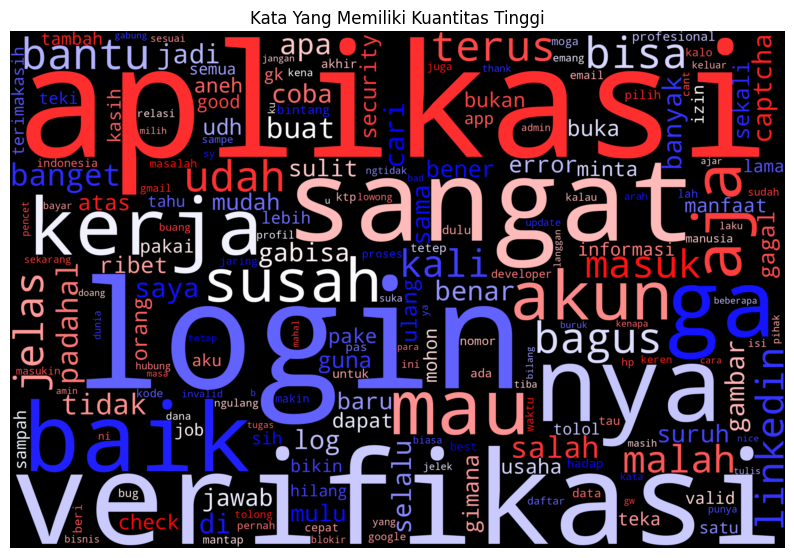

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


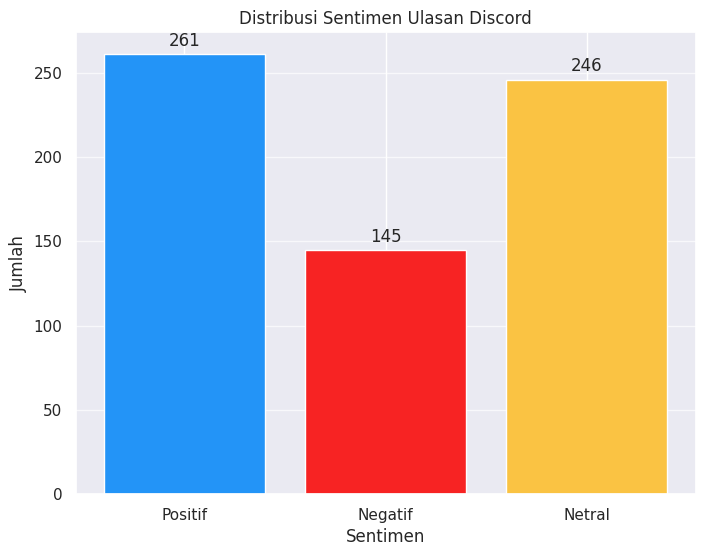

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,aplikasi tau diri bodoh,stupid self-knowledge app,Negatif
3,bagus,Good.,Positif
4,alami bug bisa login isi recaptcha tulis inval...,naturally bugs can log in recaptcha write inva...,Negatif
6,easy and simple to operate,easy and simple to operate,Positif
7,give me your best service thank you,give me your best service thank you,Positif
...,...,...,...
644,good informatif,good informative,Positif
645,nyusahin pas bagi security cek ga jelas surah ...,It's fitting for security check. It's not clea...,Positif
646,linkedin sangat manfaat banyak kalang bukan un...,Linkedin is a very beneficial lot not to pract...,Positif
648,versi baru ada tanggal postingannya jadi buat ...,The new version has a post date. So make the j...,Negatif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,aplikasi tau diri bodoh,stupid self-knowledge app,0
3,bagus,Good.,1
4,alami bug bisa login isi recaptcha tulis inval...,naturally bugs can log in recaptcha write inva...,0
6,easy and simple to operate,easy and simple to operate,1
7,give me your best service thank you,give me your best service thank you,1
...,...,...,...
644,good informatif,good informative,1
645,nyusahin pas bagi security cek ga jelas surah ...,It's fitting for security check. It's not clea...,1
646,linkedin sangat manfaat banyak kalang bukan un...,Linkedin is a very beneficial lot not to pract...,1
648,versi baru ada tanggal postingannya jadi buat ...,The new version has a post date. So make the j...,0


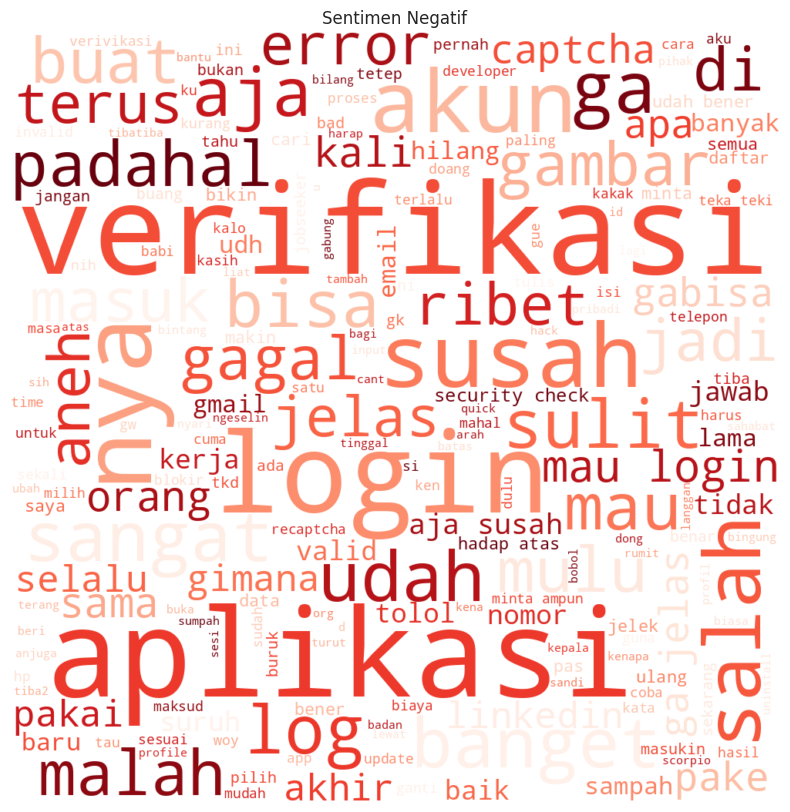

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

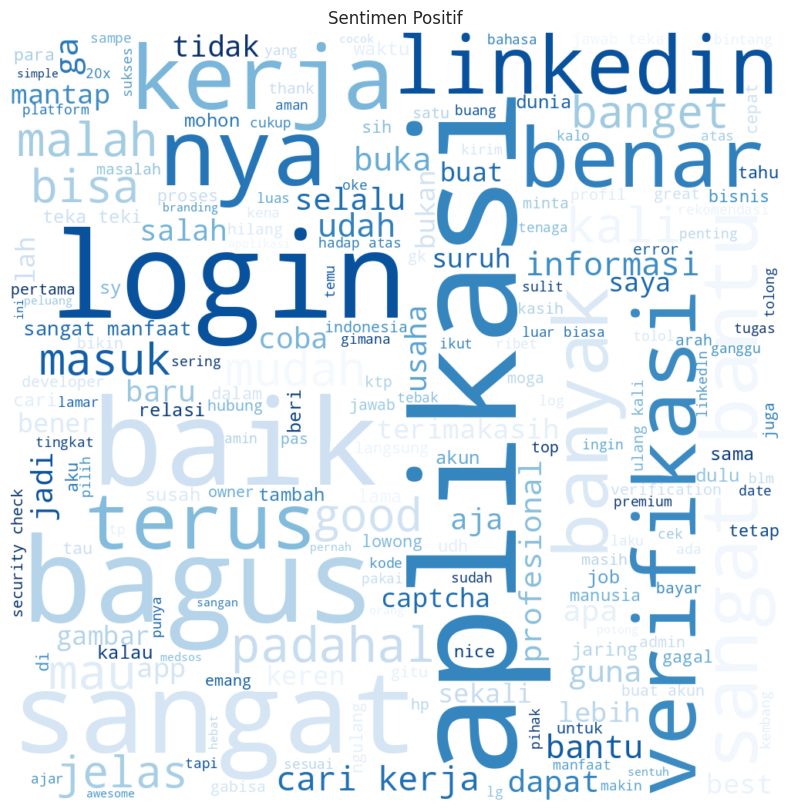

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    261
0    145
Name: count, dtype: int64

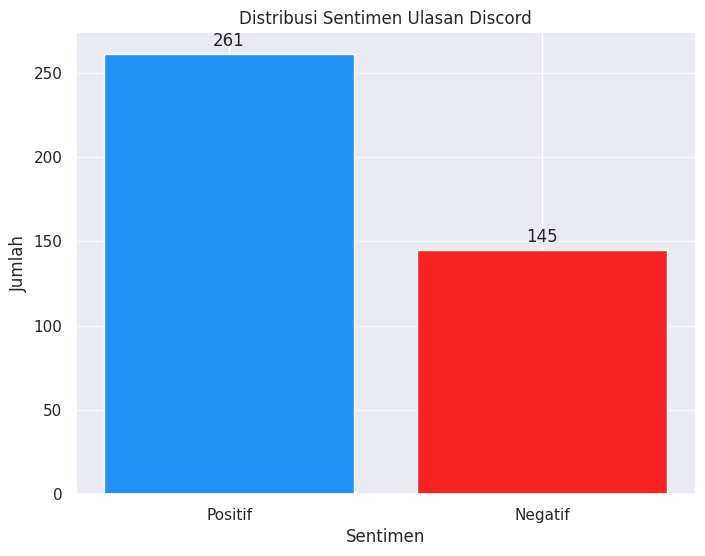

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [46]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

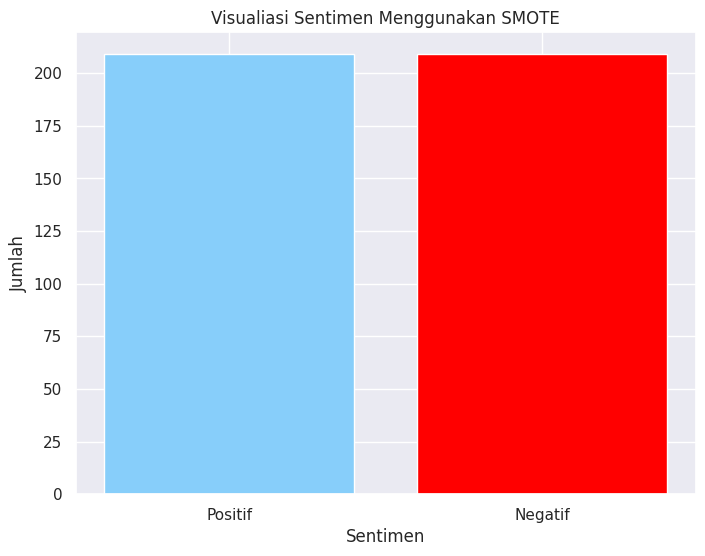

In [47]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [48]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [49]:
y_pred = naive_bayes.predict(X_test_vec)

In [50]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7926829268292683

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.67      0.87      0.75        30
     Positif       0.91      0.75      0.82        52

    accuracy                           0.79        82
   macro avg       0.79      0.81      0.79        82
weighted avg       0.82      0.79      0.80        82



# **Testing**


In [51]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : sangat susah untuk verifikasi login
Hasil Analisis Sentimen Untuk Teks Baru : Negatif
